# Import 

In [1]:
# !pip3 install pycountry_convert

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
pd.set_option('display.max_columns', None)  
pd.set_option('display.float_format', '{:.2f}'.format)

# Thu thập dữ liệu

In [ ]:
url = "https://www.worldometers.info/coronavirus/"
options = Options()
options.add_argument("start-maximized")
s = Service('chromedriver.exe')
driver = webdriver.Chrome(service=s, options=options)
driver.get(url)

# Chọn nút Yesterday
time.sleep(5)
button = driver.find_element(by=By.XPATH,value="//*[@id='nav-yesterday-tab']/a")
driver.execute_script('arguments[0].click()', button)

#Chọn nút Columns
time.sleep(2)
button = driver.find_element(by=By.XPATH,value="//*[@id='main_table_controls']/ul/div/button")
driver.execute_script('arguments[0].click()', button)

#Tick các checkbox cho tất cả cột
time.sleep(2)
for i in range(16,22):
    button = driver.find_element(by=By.XPATH,value=f"//*[@id='column_{i}']")
    driver.execute_script('arguments[0].click()', button)
    
data = WebDriverWait(driver, 20).until(EC.visibility_of_element_located((By.CSS_SELECTOR, "table#main_table_countries_yesterday"))).get_attribute("outerHTML")
df  = pd.read_html(data)
covid_df = df[0]
driver.quit()

# Khám phá dữ liệu

## Đọc dữ liệu 

In [3]:
df = pd.read_csv('data.csv', index_col=0)
df

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,NaN,World,514607738,611013.00,6266162.00,1969.00,469170487.00,818373.00,39171089.00,40862.00,66019.00,803.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,USA,83270252,62021.00,1022036.00,429.00,80795315.00,37962.00,1452901.00,1591.00,248891.00,3055.00,1007292521.00,3010756.00,334564690.00,4.00,327.00,0.00,185.00,1.00,4343.00
2,2.00,India,43088401,3235.00,523920.00,31.00,42544689.00,2802.00,19792.00,698.00,30670.00,373.00,838628250.00,596930.00,1404902630.00,33.00,2682.00,2.00,2.00,0.02,14.00
3,3.00,Brazil,30482429,21432.00,663765.00,108.00,29585304.00,30996.00,233360.00,8318.00,141560.00,3083.00,63776166.00,296176.00,215332283.00,7.00,324.00,3.00,100.00,0.50,1084.00
4,4.00,France,28757765,67017.00,146262.00,120.00,27163913.00,146246.00,1447590.00,1511.00,438791.00,2232.00,269816888.00,4116918.00,65538567.00,2.00,448.00,0.00,1023.00,2.00,22088.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,225.00,Niue,9,NaN,NaN,NaN,7.00,NaN,2.00,NaN,5468.00,NaN,NaN,NaN,1646.00,183.00,NaN,NaN,NaN,NaN,1215.00
226,226.00,Micronesia,7,NaN,NaN,NaN,1.00,NaN,6.00,NaN,60.00,NaN,NaN,NaN,117236.00,16748.00,NaN,NaN,NaN,NaN,51.00
227,227.00,Nauru,5,NaN,NaN,NaN,3.00,NaN,2.00,NaN,457.00,NaN,NaN,NaN,10949.00,2190.00,NaN,NaN,NaN,NaN,183.00
228,228.00,Saint Helena,2,NaN,NaN,NaN,2.00,NaN,0.00,NaN,327.00,NaN,NaN,NaN,6110.00,3055.00,NaN,NaN,NaN,NaN,NaN


**Các dữ liệu trống (NaN) đều là ngày đó không có giá trị nào thỏa mãn hoặc là do phép chia cho 0 nên ta thay NaN bằng giá trị 0**

In [4]:
df.fillna(value=0, inplace=True)

Sử dụng thư viện pycountry_convert để thêm cột Continent (châu lục) dựa trên cột Country,Other

In [5]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

def get_continent(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

df['Continent'] = df['Country,Other'].apply(lambda x: get_continent(x))

Thay các tên viết tắt của các châu bằng tên tiếng Anh đầy đủ để dễ nắm bắt

In [6]:
df['Continent'] = df['Continent'].map({'AF': 'Africa', 
                                                   'AS': 'Asia',
                                                   'EU': 'Europe', 
                                                   'NA': 'North America', 
                                                   'OC': 'Oceanic', 
                                                   'SA': 'South America'})

## Dữ liệu có bao nhiêu dòng và cột ? 

In [7]:
df.shape

(230, 22)

Dữ liệu gồm có 230 dòng và 22 cột tương ứng với 1 ngày thu thập 

## Các dòng dữ liệu

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [8]:
df.sample(10)

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Continent
179,179.00,San Marino,16524,48.00,115.00,0.00,16152.00,93.00,257.00,4.00,485115.00,3376.00,152231.00,4469233.00,34062.00,2.00,296.00,0.00,1409.00,0.00,7545.00,Europe
61,61.00,Slovenia,1011273,475.00,6598.00,3.00,991779.00,475.00,12896.00,22.00,486315.00,3173.00,2647759.00,1273290.00,2079462.00,2.00,315.00,1.00,228.00,1.00,6202.00,Europe
124,124.00,Jamaica,130388,89.00,2969.00,2.00,83763.00,74.00,43656.00,0.00,43683.00,995.00,1006348.00,337148.00,2984886.00,23.00,1005.00,3.00,30.00,0.70,14626.00,North America
225,225.00,Niue,9,0.00,0.00,0.00,7.00,0.00,2.00,0.00,5468.00,0.00,0.00,0.00,1646.00,183.00,0.00,0.00,0.00,0.00,1215.00,Oceanic
161,161.00,Tanzania,33872,0.00,803.00,0.00,0.00,0.00,0.00,7.00,539.00,13.00,0.00,0.00,62854783.00,1856.00,78275.00,0.00,0.00,0.00,523.00,Africa
9,9.00,Italy,16586872,62675.00,163889.00,153.00,15222419.00,67398.00,1200564.00,366.00,275079.00,2718.00,214594775.00,3558863.00,60298685.00,4.00,368.00,0.00,1039.00,3.00,19910.00,Europe
80,80.00,Dominican Republic,579443,0.00,4376.00,0.00,574726.00,0.00,341.00,1.00,52450.00,396.00,3279736.00,296875.00,11047540.00,19.00,2525.00,3.00,0.00,0.00,31.00,North America
195,195.00,Caribbean Netherlands,9801,72.00,34.00,0.00,9708.00,89.00,59.00,0.00,367492.00,1275.00,30126.00,1129584.00,26670.00,3.00,784.00,1.00,2700.00,0.00,2212.00,NaN
72,72.00,Azerbaijan,792585,6.00,9709.00,0.00,782804.00,18.00,72.00,0.00,76899.00,942.00,6820672.00,661759.00,10306888.00,13.00,1062.00,2.00,0.60,0.00,7.00,Asia
39,39.00,Sweden,2500917,0.00,18739.00,0.00,2470701.00,0.00,11477.00,21.00,244832.00,1834.00,18513445.00,1812408.00,10214832.00,4.00,545.00,1.00,0.00,0.00,1124.00,Europe


Mỗi dòng của dữ liệu (ngoại trừ dòng đầu và dòng cuối) chỉ ra các thông tin về dịch bệnh tương ứng với từng quốc gia mà trang worldometers.info/coronavirus cung cấp theo từng ngày.

### Loại bỏ dòng đầu và cuối

In [9]:
df = df[1:-1]
df = df.set_index('#')
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Continent
#,,,,,,,,,,,,,,,,,,,,,
1.00,USA,83270252,62021.00,1022036.00,429.00,80795315.00,37962.00,1452901.00,1591.00,248891.00,3055.00,1007292521.00,3010756.00,334564690.00,4.00,327.00,0.00,185.00,1.00,4343.00,North America
2.00,India,43088401,3235.00,523920.00,31.00,42544689.00,2802.00,19792.00,698.00,30670.00,373.00,838628250.00,596930.00,1404902630.00,33.00,2682.00,2.00,2.00,0.02,14.00,Asia
3.00,Brazil,30482429,21432.00,663765.00,108.00,29585304.00,30996.00,233360.00,8318.00,141560.00,3083.00,63776166.00,296176.00,215332283.00,7.00,324.00,3.00,100.00,0.50,1084.00,South America
4.00,France,28757765,67017.00,146262.00,120.00,27163913.00,146246.00,1447590.00,1511.00,438791.00,2232.00,269816888.00,4116918.00,65538567.00,2.00,448.00,0.00,1023.00,2.00,22088.00,Europe
5.00,Germany,24949403,158213.00,136183.00,236.00,22658600.00,189400.00,2154620.00,1446.00,296045.00,1616.00,122332384.00,1451576.00,84275579.00,3.00,619.00,1.00,1877.00,3.00,25566.00,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224.00,MS Zaandam,9,0.00,2.00,0.00,7.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
225.00,Niue,9,0.00,0.00,0.00,7.00,0.00,2.00,0.00,5468.00,0.00,0.00,0.00,1646.00,183.00,0.00,0.00,0.00,0.00,1215.00,Oceanic
226.00,Micronesia,7,0.00,0.00,0.00,1.00,0.00,6.00,0.00,60.00,0.00,0.00,0.00,117236.00,16748.00,0.00,0.00,0.00,0.00,51.00,Oceanic


### Dữ liệu các dòng có bị lặp hay không?

In [10]:
df[df.duplicated(keep=False)]

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,Continent
#,,,,,,,,,,,,,,,,,,,,,


Dữ liệu hoàn toàn không có dòng nào bị lặp!

## Các cột dữ liệu

### Ý nghĩa các cột

In [11]:
list(df.columns.values)

['Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/ 1M pop',
 'Population',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop',
 'Continent']

| Column | Description |
| --- | ----------- |
| Country Other| Tên đất nước |
| TotalCases | Tổng số ca nhiễm |
| NewCases | Số ca mới |
| TotalDeaths | Tổng số ca tử vong |
| NewDeaths | Số ca tử vong mới |
| TotalRecovered | Tổng số ca hồi phục |
| NewRecovered | Số ca hồi phục mới |
| ActiveCases | Số ca dương tính ở hiện tại |
| Serious,Critical | Trường hợp nặng, khẩn câp |
| Tot\xa0Cases/1M pop | Tổng số ca trên 1 triệu người |
| Deaths/1M pop | Tổng số ca tử vong trên 1 triệu người |
| TotalTests | Tổng số trường hợp kiểm tra |
| Tests/ 1M pop | Số trường hợp kiểm tra trên 1 triệu người |
| Population | Dân số |
| 1 Caseevery X ppl | tỉ lệ cứ X người dân thì có 1 người dương tính
| 1 Deathevery X ppl | tỉ lệ cứ X người dân thì có 1 người chết
| 1 Testevery X ppl | tỉ lệ cứ X người dân thì có 1 người test
| New Cases/1M pop | Số ca mắc mới/1 triệu dân
| New Deaths/1M pop | Số người chết mới/1 triệu dân
| Active Cases/1M pop | Số ca dương tính/1 triệu dân
| Continent | Châu lục
| Continent_Code | Mã châu lục

### Mỗi cột hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [12]:
df.dtypes

Country,Other           object
TotalCases               int64
NewCases               float64
TotalDeaths            float64
NewDeaths              float64
TotalRecovered         float64
NewRecovered           float64
ActiveCases            float64
Serious,Critical       float64
Tot Cases/1M pop       float64
Deaths/1M pop          float64
TotalTests             float64
Tests/ 1M pop          float64
Population             float64
1 Caseevery X ppl      float64
1 Deathevery X ppl     float64
1 Testevery X ppl      float64
New Cases/1M pop       float64
New Deaths/1M pop      float64
Active Cases/1M pop    float64
Continent               object
dtype: object

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 228 entries, 1.0 to 228.0
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country,Other        228 non-null    object 
 1   TotalCases           228 non-null    int64  
 2   NewCases             228 non-null    float64
 3   TotalDeaths          228 non-null    float64
 4   NewDeaths            228 non-null    float64
 5   TotalRecovered       228 non-null    float64
 6   NewRecovered         228 non-null    float64
 7   ActiveCases          228 non-null    float64
 8   Serious,Critical     228 non-null    float64
 9   Tot Cases/1M pop     228 non-null    float64
 10  Deaths/1M pop        228 non-null    float64
 11  TotalTests           228 non-null    float64
 12  Tests/ 1M pop        228 non-null    float64
 13  Population           228 non-null    float64
 14  1 Caseevery X ppl    228 non-null    float64
 15  1 Deathevery X ppl   228 non-null 

Bây giờ thì các dữ liệu đều đã ở dạng phù hợp để xử lý.

### Với mỗi cột có kiểu dữ liệu dạng số (numerical), các giá trị được phân bố như thế nào

In [14]:
unique_counts = df.nunique() < 25
categorical  = unique_counts[unique_counts == True].index.tolist()
categorical.extend(df.select_dtypes(exclude=["number","bool_"]).columns.tolist())
categorical

['New Deaths/1M pop', 'Continent', 'Country,Other', 'Continent']

In [15]:
numeric = [x for x in df.columns.tolist() if x not in categorical]
numeric

['TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/ 1M pop',
 'Population',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'Active Cases/1M pop']

Ở phần này, với các cột có kiểu dữ liệu số để hiểu thêm về dữ liệu, ta sẽ tính:

    Số các giá trị thiếu
    Tỉ lệ % (từ 0 đến 100) các giá trị thiếu
    Giá trị min
    Giá trị median
    Giá trị max

In [16]:
def calculate_quartile(data):
    nume_col_info_df = pd.DataFrame()
    for col in data.keys():
        missing = data[col].isnull().sum()
        missing_percentage = round(data[col].isnull().sum() * 100 / len(data[col]), 1)
        mean_value = data[col].mean()
        min_value = data[col].min()
        lower_quartile = data[col].quantile(0.25)
        median = data[col].median()
        upper = data[col].quantile(0.75)
        max_value = data[col].max()
        row_line = pd.Series([missing,missing_percentage,mean_value, min_value, lower_quartile, median, upper, max_value], 
                            index = ['num_missing','missing_percentage', 'mean','min', 'lower_quartile', 'median', 'upper_quartile', 'max'])
        nume_col_info_df[col] = row_line
    return nume_col_info_df
calculate_quartile(df[numeric])

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/ 1M pop,Population,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,Active Cases/1M pop
num_missing,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
missing_percentage,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
mean,2257051.48,2679.88,27483.17,8.64,2008282.26,3589.36,71942.03,179.22,143062.00,1101.04,27592452.75,1788634.69,34639607.95,576.20,12917.04,11.18,179.05,23891.26
min,2.00,0.00,0.00,0.00,0.00,0.00,-98.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-1198.12
lower_quartile,22712.00,0.00,180.00,0.00,9537.00,0.00,85.75,0.00,10417.25,111.00,230600.00,82093.00,444799.75,4.00,502.50,0.00,0.00,57.75
median,169000.00,3.00,1913.50,0.00,82916.00,0.00,1255.50,4.00,88998.50,681.50,1754982.50,627356.00,5661871.00,10.00,1224.00,1.00,0.20,1062.00
upper_quartile,1068366.75,157.75,12378.25,1.00,883823.50,128.25,23721.75,43.75,245361.75,1832.50,11061075.00,1947186.75,21672155.50,87.00,5746.00,5.00,58.25,7962.00
max,83270252.00,158213.00,1022036.00,429.00,80795315.00,189400.00,2154620.00,8318.00,704374.00,6295.00,1007292521.00,21827245.00,1439323776.00,62428.00,624278.00,196.00,4774.00,547455.00


### Với mỗi cột có kiểu dữ liệu dạng phân loại (categorical), các giá trị được phân bố như thế nào?

In [17]:
df['Country,Other'].value_counts()

USA                   1
Bhutan                1
Belize                1
Cabo Verde            1
Syria                 1
                     ..
Dominican Republic    1
Estonia               1
Bahrain               1
Venezuela             1
Saint Helena          1
Name: Country,Other, Length: 228, dtype: int64

#### Số lượng các giá trị khác nhau? Show một vài giá trị → Có gì bất thường không?

In [18]:
df['Country,Other'].sample(10)

#
156.00         Mayotte
16.00             Iran
107.00      Mozambique
50.00       Kazakhstan
142.00           Sudan
167.00           Benin
33.00      Switzerland
212.00       St. Barth
210.00    Cook Islands
128.00           Malta
Name: Country,Other, dtype: object

Có vẻ như không có gì bất thường ở đây!

## Sơ lược mối tương quan giữa các cột

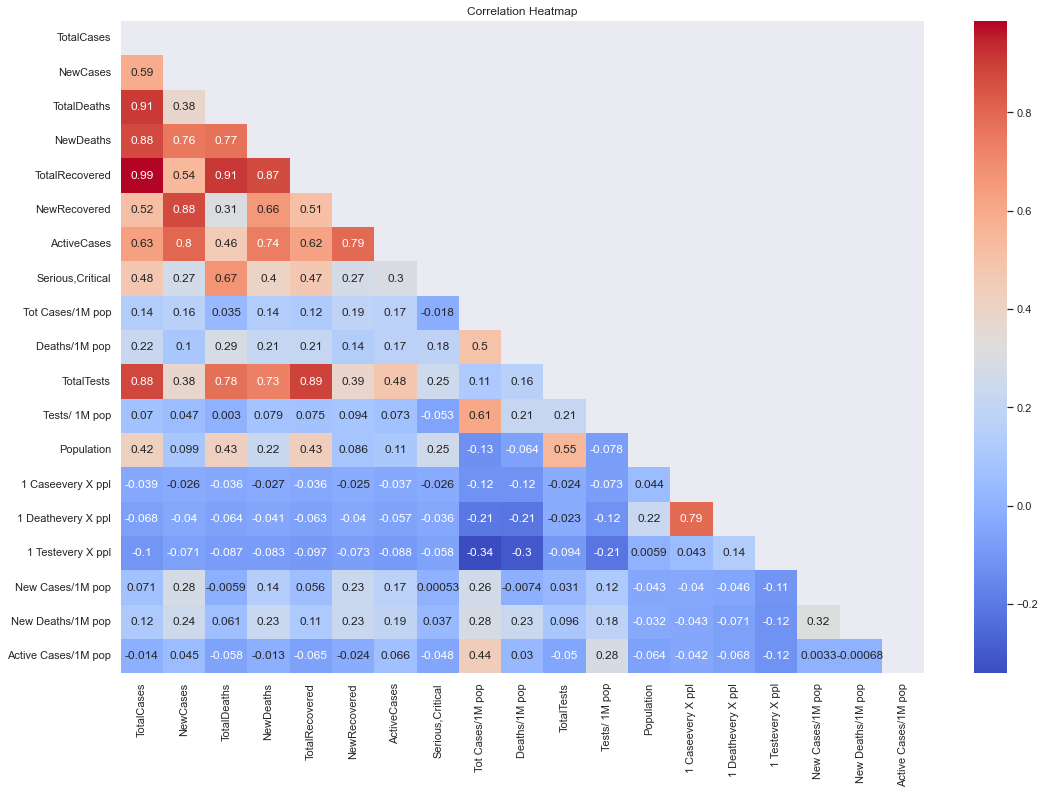

In [19]:
df_corr = df.corr()
mask = np.zeros_like(df_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize=(18,12))
sns.heatmap(df_corr, cmap="coolwarm", annot=True, mask=mask)
plt.title("Correlation Heatmap");

==> Lựa chọn các cột: <br>
    (Tot Cases/1M pop, Tests/ 1M pop) <br>
    (1 Caseevery X ppl, 1 Deathevery X ppl)

# Phân tích dữ liệu

## Dữ liệu đơn biến

Lựa chọn phân tích các trường dữ liệu: Continent,Tot Cases/1M pop, Tests/ 1M pop, 1 Caseevery X ppl, 1 Deathevery X ppl

### Cột Continent

Đầu tiên ta dùng count plot để xem số lượng các quốc gia ở mỗi châu lục

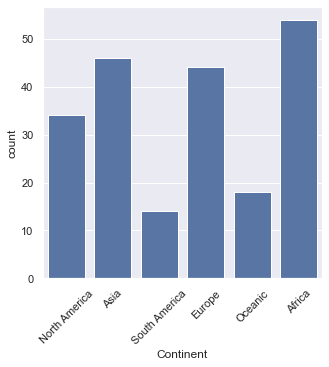

In [39]:
f,ax = plt.subplots(figsize =(5,5))
sns.countplot(x='Continent',data=df,ax=ax,color='b')
plt.xticks(rotation= 45)
plt.show()

Có thể thấy châu Phi có nhiều quốc gia nhất, châu Đại Dương có nhiều quốc gia hơn cả Nam Mỹ, có thể là vì tính cả các quần đảo

Tiếp theo dùng pie chart để xem phân bố số lượng quốc gia thuộc mỗi nước

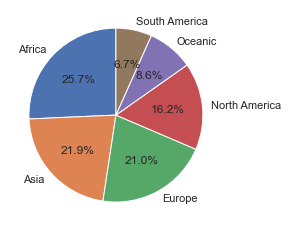

In [40]:
cont = df.groupby('Continent')['Country,Other'].count()
plt.pie(cont.values,labels = cont.index,autopct='%1.1f%%',startangle=90);

Châu Phi, châu Á và châu Âu chiếm gần 3/4 số lượng quốc gia trên thế giới. Riêng châu Phi có số lượng quốc gia bằng 1/4 toàn bộ quốc gia.

### Cột Tot Cases/1M pop và cột Tests/ 1M pop

Đối với các biến numerical, đầu tiên ta dùng histogram để xem tần suất của chúng

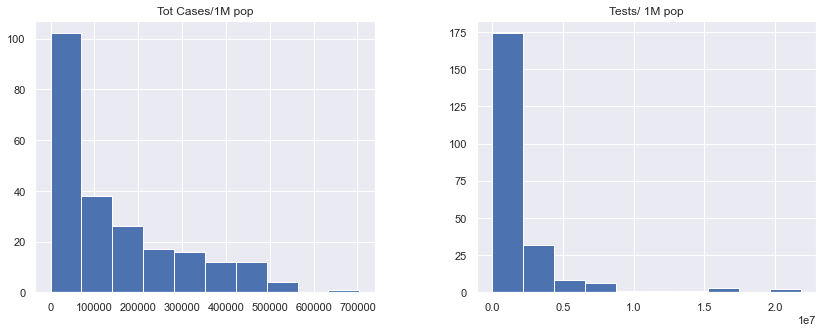

In [41]:
df[['Tot\xa0Cases/1M pop','Tests/ 1M pop']].hist(figsize=(14,5));

In [42]:
df[['Country,Other','Tot\xa0Cases/1M pop']].sort_values('Tot\xa0Cases/1M pop',ascending=False).head(3)

,"Country,Other",Tot Cases/1M pop
#,,
160.00,Faeroe Islands,704374.00
111.00,Iceland,538057.00
153.00,Andorra,533591.00


- Có thể thấy phần lớn các nước đều có tỉ lê tổng số ca trên 1 triệu dân vào khoảng từ 0 đến 20000. Nước có tỉ lệ này cao nhất là quần đảo Faroe thuộc châu Âu, hơn 700,000 ca/1 triệu dân.
- Tương tự, phân lớn các nước đều có tỉ lệ tổng số lần test trên 1 triệu dân vào khoảng từ 0 đến 5 triệu lần test. Bên cạnh đó, các nước có số lần test trên 1 triệu dân dưới 100,000 là rất nhiều (120 nước) 

Tiếp theo ta dùng box plot để xem phân bố của các thuộc tính

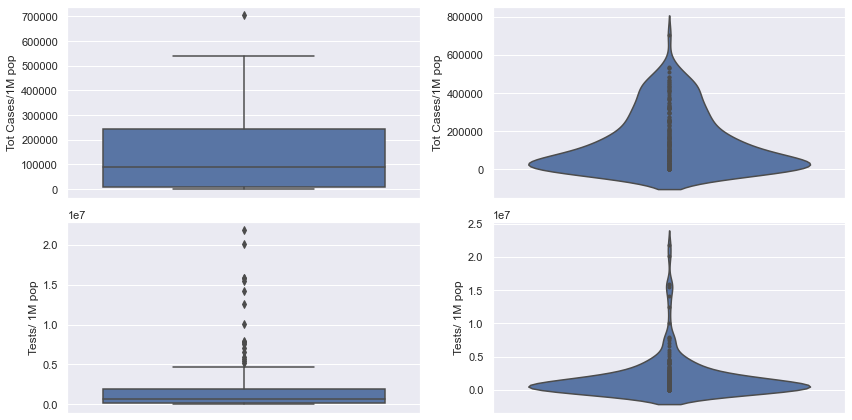

In [43]:
fig,ax = plt.subplots(2,2,figsize=(12,6))
sns.boxplot(y='Tot\xa0Cases/1M pop',data=df,ax=ax[0,0])
sns.violinplot(y='Tot\xa0Cases/1M pop',data=df, inner="points",ax=ax[0,1])
sns.boxplot(y='Tests/ 1M pop',data=df,ax=ax[1,0])
sns.violinplot(y='Tests/ 1M pop',data=df, inner="points",ax=ax[1,1])
plt.tight_layout()
plt.show()

In [44]:
len(df[df['Tot\xa0Cases/1M pop'] < 100000])

120

In [45]:
len(df[df['Tests/ 1M pop'] > 500000])

124

- Đối với thuộc tính đầu tiên, ta có thể khẳng định kết luận từ biểu đồ histogram là đúng khi tỉ lệ tổng số ca trên 1 triệu dân nằm hầu hết từ 0 đến 2 triệu dân. Có 120 nước có  thấp hơn 100,000 ca trên 1 triệu dân
- Biểu đồ của thuộc tính thứ 2 cũng hầu như tập trung ở dưới, ngoài ra cũng có nhiều quốc gia là outlier xuất hiện với số lượng test lớn hơn vượt trội. Số lượng các quốc gia có con số lớn hơn giá trị lớn nhất trong box plot là tận 124 nước

### Cột 1 Caseevery X ppl và cột 1 Deathevery X ppl

Tương tự, đầu tiên ta dùng histogram để xem tần suất phân bố của các thuộc tính

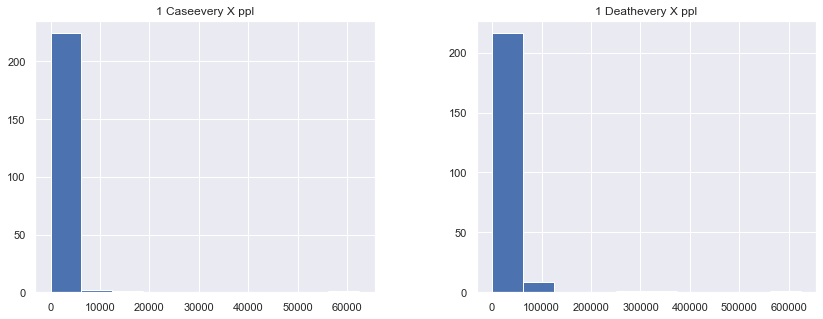

In [46]:
df[['1 Caseevery X ppl','1 Deathevery X ppl']].hist(figsize=(14,5));

Hầu như phân bố của các thuộc tính được xét đều lệch về phía bên trái của biểu đồ (lệch về phía của 0). Các phân bố này không đều vì có sự xuất hiện của các outlier với giá trị vượt trội

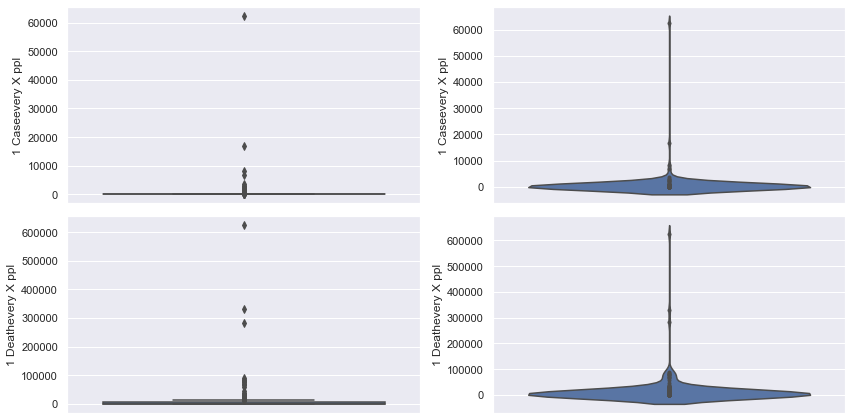

In [47]:
fig,ax = plt.subplots(2,2,figsize=(12,6))
sns.boxplot(y='1 Caseevery X ppl',data=df,ax=ax[0,0])
sns.violinplot(y='1 Caseevery X ppl',data=df, inner="points",ax=ax[0,1])
sns.boxplot(y='1 Deathevery X ppl',data=df,ax=ax[1,0])
sns.violinplot(y='1 Deathevery X ppl',data=df, inner="points",ax=ax[1,1])
plt.tight_layout()
plt.show()

Có thể thấy phân bố của 2 thuộc tính này còn lệch hơn nhiều so với 2 thuộc tính ta xét ở trên. Ở biểu đồ boxplot ta còn không thấy được khoảng các giữa các phân vị

## Phân tích mối quan hệ 2 biến

#### Biến continent và các biến khác

Kiểm tra mối tương quan của các thuộc tính đối với biến Continent thông qua biến Continent_Code là mã của các châu lục

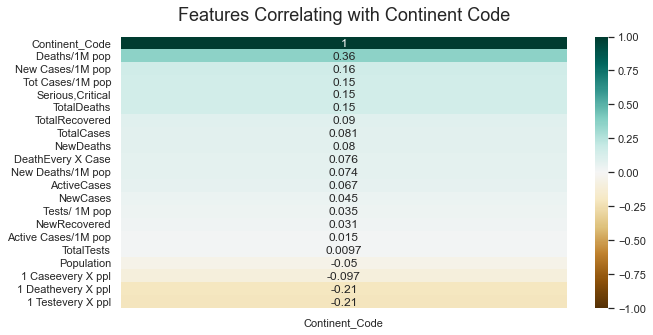

In [56]:
df['Continent_Code'] = df['Continent'].astype('category').cat.codes
corrMatrix = df.corr()
plt.figure(figsize=(10, 5))
heatmap = sns.heatmap(corrMatrix[['Continent_Code']].sort_values(by='Continent_Code', ascending=False), 
                      vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Continent Code', fontdict={'fontsize':18}, pad=16);

Không có thuộc tính nào có mối tương quan gần gũi với biến Continent_Code. Biến có giá trị tương quan lớn nhất là Deaths/1M pop cũng chỉ là 0.36. Ta sẽ sử dụng biến Continent để xem sự khác nhau giữa các châu lục từ đó có thể phát hiện một vài mối quan hệ

Đầu tiên dùng pie chart để xem phân bố số ca nhiễm và số lượt test trên 1 triệu dân theo từng châu

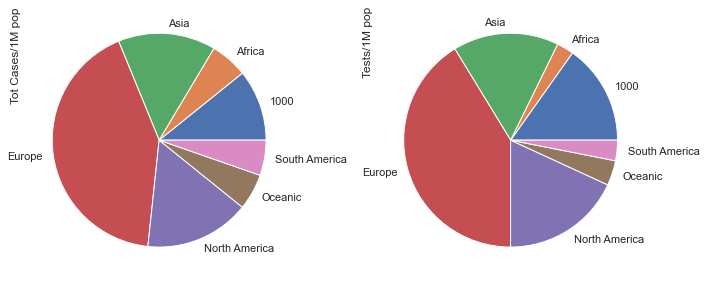

In [57]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
df.groupby('Continent')['Tot\xa0Cases/1M pop'].sum().plot(kind='pie',ax=ax[0]);
ax[0].set_ylabel('Tot Cases/1M pop',loc='top')
df.groupby('Continent')['Tests/ 1M pop'].sum().plot(kind='pie',ax=ax[1]);
ax[1].set_ylabel('Tests/1M pop',loc='top')
plt.tight_layout()

Châu Âu có tổng số lượng ca nhiễm cũng như tổng số lần test trên 1 triệu dân là cao nhất so với các châu còn lại

Tiếp theo, ta dùng swarm plot để xem sự phân bố của Tot Cases/1M pop theo từng châu lục

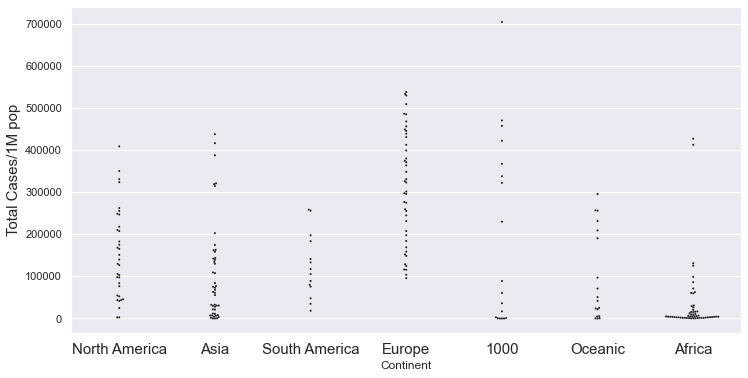

In [58]:
f,ax = plt.subplots(figsize =(12,6))
sns.swarmplot(x="Continent" , y="Tot\xa0Cases/1M pop",data=df,ax=ax,color='k',s=2)
plt.xticks(fontsize=15)
plt.ylabel('Total Cases/1M pop',fontsize=15)
plt.show()

- Dễ thấy rằng ở châu Âu, số ca mắc Covid là vượt trội so với phần còn lại, ngay cả quốc gia có tỉ lệ số ca mắc trên 1 triệu người dân thấp nhất ở châu Âu cũng cao hơn hầu hết các nước ở châu Phi
- Từ biểu đồ ta thấy được các nước ở châu Phi có tỉ lệ số ca mắc trên 1 triệu người dân là vô cùng thấp, các giá trị đều tập trung ở sát đáy trục

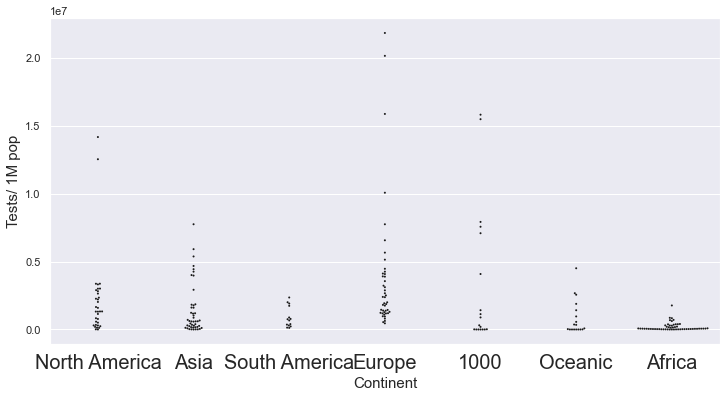

In [59]:
f,ax = plt.subplots(figsize =(12,6))
sns.swarmplot(x="Continent" , y="Tests/ 1M pop",data=df,ax=ax,s=2,color='k')
plt.xticks(fontsize=20)
plt.ylabel('Tests/ 1M pop',fontsize=15)
plt.xlabel('Continent',fontsize=15)
plt.show()

- Về số lần test thì ngoài một vài quốc gia có số lần test trên 1 triệu dân cao vượt trội thì hầu như phân bố của châu Âu cũng không quá chênh lệch với Bắc Mỹ và châu Á
- Ngoài ra để biết được phần nào tình hình hiện giờ thì ta cũng xem sự phân bố số ca đang bị nhiễm Covid trên 1 triệu dân ở các châu lục

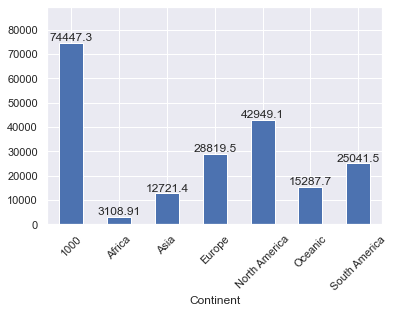

In [60]:
bars = df.groupby('Continent')['Active Cases/1M pop'].mean().plot(kind='bar')
plt.xticks(rotation=45)
bars.bar_label(bars.containers[0], label_type='edge')
bars.margins(y=0.2)

Các nơi có tỉ lệ số ca cao nhất là châu Âu, Nam Mĩ và đặc biệt là Bắc Mỹ

Với các biến 1 Caseevery X ppl và 1 Deathevery X ppl thì ta không thể cộng dồng rồi so sánh chúng giữa các châu nên ta sẽ sử dụng giá trị trung bình của từng châu

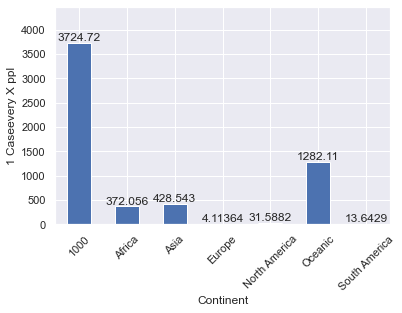

In [61]:
bars = df.groupby('Continent')['1 Caseevery X ppl'].mean().plot(kind='bar')
plt.ylabel('1 Caseevery X ppl')
plt.xticks(rotation=45)
bars.bar_label(bars.containers[0], label_type='edge')
bars.margins(y=0.2)

- Châu Đại Dương có tỉ lệ 1 Caseevery X ppl cao nhất, tức là trung bình cứ khoảng 2500 người mới có một người mắc
- Châu Âu, Bắc và Nam Mỹ có tỉ lệ trên rất thấp. Điều này có nghĩa là ở các châu này, cứ khoảng từ 10 đến 30 người là có 1 người mắc phải covid

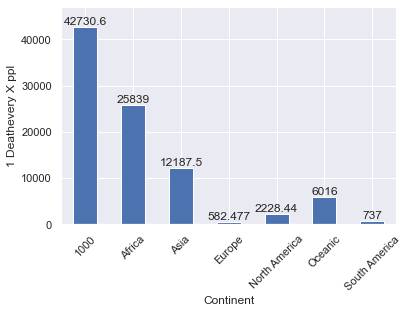

In [62]:
bars = df.groupby('Continent')['1 Deathevery X ppl'].mean().plot(kind='bar')
plt.ylabel('1 Deathevery X ppl')
plt.xticks(rotation=45)
bars.bar_label(bars.containers[0], label_type='edge')
bars.margins(y=0.1)

- Ở châu Phi cứ 25832 người mới có một người chết vì Covid, điều này là rất đáng mừng. Tuy nhiên, các con số này vẫn có khả năng không chính xác vì nền khoa học ở châu Phi nhiều nơi còn lạc hậu, do đó có thể số liệu không được cung cấp đầy đủ. Dù vậy, con số trên vẫn là rất lớn so với các châu còn lại
- Ở Bắc Mỹ và Nam Mỹ, con số là rất báo động khi cứ lần lượt là 584 người ở Bắc Mỹ và 737 người ở Nam Mỹ là sẽ có một người chết vì Covid. Do đó ở những nơi này cần phải đề cao phòng bị

#### (Tot Cases/1M pop - Tests/ 1M pop)

Để tìm mối tương quan giữa Tot Cases/1M pop và Tests/ 1M pop, đầu tiên ta vẽ scatter plot của 2 thuộc tính cùng với một đường hồi quy

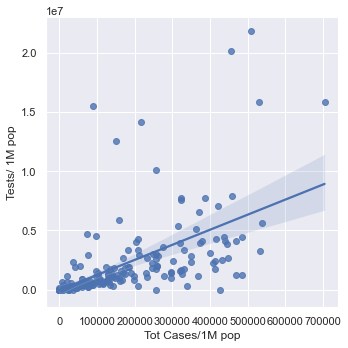

In [63]:
sns.lmplot(x='Tot\xa0Cases/1M pop',y='Tests/ 1M pop',data=df)

Từ heatmap ở trên ta biết được mối quan hệ giữa 2 thuộc tính là 0.61. Đường hồi quy vẽ từ các điểm trong biểu đồ cho thấy mối tương quan giữa 2 thuộc tính phần nào đó là tuyến tính

Tiếp theo ta chuẩn hóa MinMax cho 2 thuộc tính rồi biểu diễn bằng point plot để xem được sự thay đổi của chúng theo từng châu lục

In [64]:
df_normalized = df.copy()
# Using sklearn

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

df_normalized.loc[:,['Tot\xa0Cases/1M pop', 
                     'Tests/ 1M pop']] = scaler.fit_transform(df_normalized.loc[:,['Tot\xa0Cases/1M pop', 
                                                                                       'Tests/ 1M pop']])

dataframe = pd.pivot_table(df_normalized, index = 'Continent', values=["Tests/ 1M pop","Tot\xa0Cases/1M pop"])
dataframe

,Tests/ 1M pop,Tot Cases/1M pop
Continent,,
1000,0.16,0.28
Africa,0.01,0.05
Asia,0.06,0.15
Europe,0.18,0.44
North America,0.10,0.22
Oceanic,0.04,0.14
South America,0.04,0.18


Dataframe ở trên chứa giá trị trung bình của từng thuộc tính ở từng châu lục sau khi đã được chuẩn hóa
- Vẽ point plot để xem tỉ lệ của từng vùng so với nhau (không so sánh giá trị lớn, bé của tổng số ca với tổng số lần test)

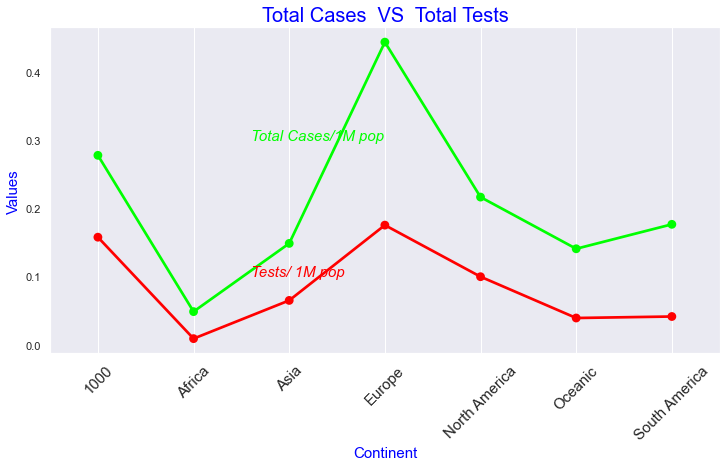

In [65]:
plt.subplots(figsize =(12,6))

sns.pointplot(x=dataframe.index,y='Tot\xa0Cases/1M pop',data=dataframe,color='lime',alpha=0.8)
sns.pointplot(x=dataframe.index,y='Tests/ 1M pop',data=dataframe,color='red',alpha=0.8)

plt.text(1.6,0.3,'Total Cases/1M pop',color='lime',fontsize = 15,style = 'italic')
plt.text(1.6,0.1,'Tests/ 1M pop',color='red',fontsize = 15,style = 'italic')

plt.xticks(rotation=45,fontsize=15)
plt.xlabel('Continent',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Total Cases  VS  Total Tests',fontsize = 20,color='blue')
plt.grid()
plt.show()

Từ point plot ta thấy được rằng:
- Ở các châu lục có số lượng test cao thì tổng sô ca nhiễm cũng cao (châu Âu, Bắc Mỹ). Vì đây là tỉ lệ trên 1 triệu dân nên số liệu này khá khách quan (không bị ảnh hưởng bởi dân số từng vùng).
- Các châu lục có lượng lượt test thấp thì tổng số ca nhiễm cũng không cao (châu Phi, châu Đại Dương). Do đó những nơi này có số ca nhiễm thấp không hẳn là vì đã kiểm soát được dịch bệnh mà có thể là do người dân không thực hiện test covid quá nhiều (bị covid không triệu chứng hoặc là do tự cách ly tại nhà, không cần test)

#### (1 Caseevery X ppl - 1 Deathevery X ppl)

Để tìm mối tương quan giữa 1 Caseevery X ppl và 1 Deathevery X ppl, đầu tiên ta vẽ scatter plot của 2 thuộc tính cùng với một đường hồi quy

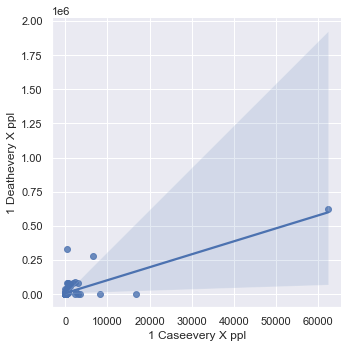

In [66]:
sns.lmplot(x='1 Caseevery X ppl',y='1 Deathevery X ppl',data=df)

Ta có thấy dữ liệu của 2 thuộc tính chứa quá nhiều outlier nên tiếp theo ta sẽ loại bỏ bớt các outlier rồi thực hiện lại scatterplot
- Ở đây ta sẽ loại bỏ các giá trị lớn hơn phân vị 95% của 2 thuộc tính sau đó vẽ lại biểu đồ scatter

In [67]:
q1 = df["1 Caseevery X ppl"].quantile(0.95)
q2 = df["1 Deathevery X ppl"].quantile(0.95)

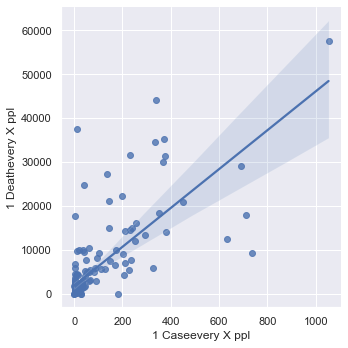

In [68]:
dff =  df.drop(df[df['1 Caseevery X ppl'] > q1].index)
dff = dff.drop(dff[dff['1 Deathevery X ppl'] > q2].index)
sns.lmplot(x='1 Caseevery X ppl',y='1 Deathevery X ppl',data=dff)

In [69]:
dff[['1 Caseevery X ppl','1 Deathevery X ppl']].corr()

,1 Caseevery X ppl,1 Deathevery X ppl
1 Caseevery X ppl,1.00,0.74
1 Deathevery X ppl,0.74,1.00


Có thể thấy lúc này mối quan hệ giữa 2 thuộc tính đã là tuyến tính khi đường hồi quy đã đẹp hơn nhiều. Giá trị tương quan lúc này đã tăng từ 0.69 lên 0.74

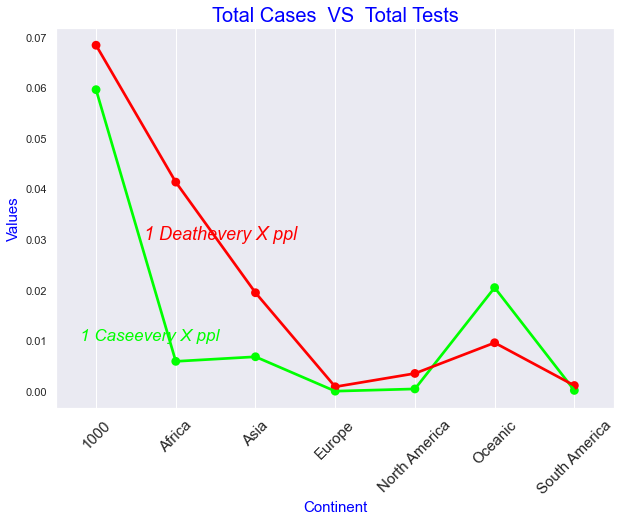

In [70]:
df_normalized = df.copy()
# Using sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

df_normalized.loc[:,['1 Caseevery X ppl', 
                     '1 Deathevery X ppl']] = scaler.fit_transform(df_normalized.loc[:,['1 Caseevery X ppl', 
                                                                                       '1 Deathevery X ppl']])
dataframe = pd.pivot_table(df_normalized, index = 'Continent', values=["1 Caseevery X ppl","1 Deathevery X ppl"])

f,ax1 = plt.subplots(figsize =(10,7))
sns.pointplot(x=dataframe.index,y='1 Caseevery X ppl',data=dataframe,color='lime',alpha=0.8,ax=ax1)
sns.pointplot(x=dataframe.index,y='1 Deathevery X ppl',data=dataframe,color='red',alpha=0.8,ax=ax1)
ax1.text(-0.2,0.01,'1 Caseevery X ppl',color='lime',fontsize = 17,style = 'italic')
ax1.text(0.6,0.03,'1 Deathevery X ppl',color='red',fontsize = 18,style = 'italic')
plt.xticks(rotation=45,fontsize=15)
plt.xlabel('Continent',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Total Cases  VS  Total Tests',fontsize = 20,color='blue')
plt.grid()
plt.show()

2 thuộc tính này có vẻ như không có mối quan hệ với biến Continent khi từ biểu đồ pointplot ta không thể thấy được 1 điều gì đặc biệt

<hr>